### **Bibliotecas**


In [284]:
!pip install yfinance --upgrade --no-cache-dir

In [285]:
!pip install yfinance

In [286]:
!pip install quantstats

In [287]:
!pip -q install yfinance

In [288]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
import pandas as pd
import string
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pandas.util._tester import test
import pandas.testing
import pandas.arrays
import quantstats as qs
import requests
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

import urllib.request
from bs4 import BeautifulSoup

from itertools import combinations
import IPython
import cufflinks as cf
cf.go_offline()
#cf.getThemes()

## plotly
import plotly

# configurando o plotly para rodar adequadamento no google colab junto com cufflinks
plotly.io.renderers.defaut = 'colab'

In [289]:
from google.colab import files

In [290]:
qs.extend_pandas()

## **Capturando e tratando Dados**

##***Dados do site Fundamentos***

In [291]:
url = 'http://www.fundamentus.com.br/resultado.php'


In [292]:
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [293]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[0]

In [294]:
df.head(15)

,Papel,Cotação,P/L,P/VP,PSR,Div.Yield,P/Ativo,P/Cap.Giro,P/EBIT,P/Ativ Circ.Liq,EV/EBIT,EV/EBITDA,Mrg Ebit,Mrg. Líq.,Liq. Corr.,ROIC,ROE,Liq.2meses,Patrim. Líq,Dív.Brut/ Patrim.,Cresc. Rec.5a
0,PORP4,2.40,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","-2,08%",0.00,2.239900e+07,0.00,"13,66%"
1,CLAN3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","-1,05%",0.00,1.012240e+09,0.00,"-63,96%"
2,CSTB3,150.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"40,85%","28,98%",2.60,"22,40%","20,11%",0.00,8.420670e+09,0.14,"31,91%"
3,MNSA4,0.47,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"-208,15%","-362,66%",3.63,"-13,50%","145,70%",0.00,-9.105000e+06,-6.52,"-41,11%"
4,IVTT3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","-0,40%",0.00,1.083050e+09,0.00,"20,67%"
5,POPR4,10.17,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"8,66%","5,65%",1.08,"15,25%","19,93%",0.00,5.458030e+08,0.82,"30,93%"
6,CSTB4,147.69,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"40,85%","28,98%",2.60,"22,40%","20,11%",0.00,8.420670e+09,0.14,"31,91%"
7,PMET3,0.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"0,00%","0,00%",0.00,"0,00%","4,10%",0.00,-2.908630e+08,0.00,"37,74%"
8,CFLU4,1000.00,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"8,88%","10,72%",1.10,"17,68%","32,15%",0.00,6.035100e+07,0.06,"8,14%"
9,MNSA3,0.42,0.00,0.00,0.000,"0,00%",0.000,0.00,0.00,0.00,0.00,0.00,"-208,15%","-362,66%",3.63,"-13,50%","145,70%",0.00,-9.105000e+06,-6.52,"-41,11%"


In [295]:
for coluna in ['Div.Yield', 'Mrg Ebit', 'Mrg. Líq.', 'ROIC', 'ROE', 'Cresc. Rec.5a']:
  df[coluna] = df[coluna].str.replace('.', '')
  df[coluna] = df[coluna].str.replace(',', '.')
  df[coluna] = df[coluna].str.rstrip('%').astype('float') / 100

***Analisando os Dados - Fundamentus***

In [296]:
df = df[df['Liq.2meses'] > 10000000]

In [297]:
ranking = pd.DataFrame()
ranking['pos'] = range(1,151)
ranking['EV/EBIT'] = df[ df['EV/EBIT'] > 0 ].sort_values(by=['EV/EBIT'])['Papel'][:150].values
ranking['ROIC'] = df.sort_values(by=['ROIC'], ascending=False)['Papel'][:150].values
ranking['ROE'] = df.sort_values(by=['ROE'], ascending=False)['Papel'][:150].values
ranking['Mrg. Líq.'] = df.sort_values(by=['Mrg. Líq.'], ascending=False)['Papel'][:150].values
ranking['EV/EBITDA'] = df.sort_values(by=['EV/EBITDA'], ascending=False)['Papel'][:150].values
ranking['Cresc. Rec.5a'] = df.sort_values(by=['Cresc. Rec.5a'], ascending=False)['Papel'][:150].values

In [298]:
ranking.head(15)

,pos,EV/EBIT,ROIC,ROE,Mrg. Líq.,EV/EBITDA,Cresc. Rec.5a
0,1,PSSA3,CMIN3,TASA4,LOGG3,CASH3,RCSL3
1,2,GOAU4,WIZS3,BEEF3,ITSA4,RCSL3,VAMO3
2,3,EVEN3,PSSA3,BRKM5,LUPA3,ELET3,VIVR3
3,4,USIM5,TASA4,MRFG3,CESP6,ELET6,LCAM3
4,5,CMIN3,VALE3,SUZB3,TRPL4,LWSA3,BPAC11
5,6,VALE3,UNIP6,VIVR3,ENAT3,AESB3,PRIO3
6,7,CSNA3,CSNA3,ASAI3,JPSA3,ITSA4,AGRO3
7,8,LAVV3,BLAU3,CSNA3,TAEE11,SOMA3,ALUP11
8,9,ETER3,ETER3,ETER3,IGTA3,SMFT3,HBSA3
9,10,MRFG3,MRFG3,LUPA3,BRPR3,MGLU3,JHSF3


In [299]:
a = ranking.pivot_table(columns='EV/EBIT', values='pos').head(15)

In [300]:
b = ranking.pivot_table(columns='ROIC', values='pos').head(15)

In [301]:
c = ranking.pivot_table(columns='ROE', values='pos')

In [302]:
d = ranking.pivot_table(columns='Mrg. Líq.', values='pos')

In [303]:
e = b = ranking.pivot_table(columns='EV/EBITDA', values='pos')

In [304]:
f = b = ranking.pivot_table(columns='Cresc. Rec.5a', values='pos')

In [305]:
t = pd.concat([a,b,c,d,e,f])
t

,AALR3,ABEV3,AESB3,AGRO3,ALLD3,ALPA4,ALSO3,ALUP11,AMAR3,AMBP3,AMER3,ANIM3,ARZZ3,ASAI3,B3SA3,BEEF3,BLAU3,BMOB3,BOAS3,BRFS3,BRKM5,BRML3,BRPR3,CAML3,CCRO3,CESP6,CIEL3,CMIG3,CMIG4,CMIN3,CPFE3,CPLE11,CPLE3,CPLE6,CRFB3,CSAN3,CSMG3,CSNA3,CYRE3,DIRR3,...,VIVA3,VIVT3,WEGE3,WIZS3,YDUQ3,ABCB4,BBAS3,BBDC3,BBDC4,BIDI11,BIDI3,BIDI4,BKBR3,BPAC11,BPAN4,BRSR6,CASH3,CEAB3,IRBR3,LWSA3,RCSL3,SANB11,SMFT3,SULA11,VIVR3,AZUL4,BBSE3,BRAP3,BRAP4,CXSE3,ELET3,ELET6,GOLL4,ITUB3,ITUB4,LUPA3,TPIS3,SEQL3,COGN3,MEAL3
pos,114.0,99,149.0,36,23.0,125.0,107.0,13,96.0,127,146.0,123.0,134,86.0,76,38,89,54,128.0,85,12.0,101.0,119.0,64,88,66,62.0,51,35,5.0,49,37,34,41,63,120,31,7.0,73,40,...,112,95,136,11,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,NaN,94,144.0,7,NaN,NaN,23.0,8,NaN,140,76.0,64.0,93,NaN,19,42,47,147,129.0,117,83.0,NaN,NaN,37,131,92,NaN,103,104,NaN,95,77,79,78,65,33,107,40.0,70,51,...,143,137,39,53,122,60.0,134.0,26.0,25.0,13.0,14.0,12.0,121.0,5.0,73.0,90.0,139.0,71.0,89.0,16.0,1.0,116.0,63.0,130.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos,NaN,75,NaN,94,51.0,101.0,NaN,60,NaN,128,NaN,NaN,71,7.0,64,2,57,147,NaN,117,3.0,NaN,NaN,90,129,37,130.0,58,59,15.0,34,81,83,82,69,47,97,8.0,27,112,...,86,138,40,12,143,122.0,111.0,92.0,93.0,NaN,NaN,NaN,NaN,68.0,105.0,120.0,NaN,NaN,NaN,NaN,NaN,66.0,NaN,53.0,6.0,65.0,13.0,22.0,21.0,84.0,137.0,136.0,55.0,74.0,73.0,10.0,80.0,NaN,NaN,NaN
pos,133.0,35,122.0,32,114.0,89.0,46.0,15,NaN,94,NaN,148.0,77,108.0,14,137,33,38,96.0,140,86.0,78.0,10.0,117,109,4,63.0,69,68,20.0,76,58,57,56,120,70,62,16.0,11,88,...,52,87,66,31,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,142.0,146.0,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,44.0,43.0,NaN,NaN,NaN,3.0,79.0,150.0,NaN,NaN
pos,67.0,54,6.0,129,136.0,23.0,55.0,145,110.0,29,18.0,42.0,21,59.0,75,115,53,108,52.0,95,NaN,38.0,20.0,90,99,92,111.0,102,124,NaN,103,123,127,121,85,35,140,NaN,71,114,...,34,125,13,147,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,84.0,NaN,5.0,2.0,NaN,9.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,109.0,33.0,25.0,45.0
pos,NaN,94,144.0,7,NaN,NaN,23.0,8,NaN,140,76.0,64.0,93,NaN,19,42,47,147,129.0,117,83.0,NaN,NaN,37,131,92,NaN,103,104,NaN,95,77,79,78,65,33,107,40.0,70,51,...,143,137,39,53,122,60.0,134.0,26.0,25.0,13.0,14.0,12.0,121.0,5.0,73.0,90.0,139.0,71.0,89.0,16.0,1.0,116.0,63.0,130.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [306]:
rank = t.dropna(axis=1).sum().head(15)
rank

ABEV3     451
AGRO3     305
ALUP11    249
AMBP3     658
ARZZ3     489
B3SA3     267
BEEF3     376
BLAU3     326
BMOB3     641
BRFS3     671
CAML3     435
CCRO3     687
CESP6     383
CMIG3     486
CMIG4     494
dtype: int64

In [307]:
rank.sort_values()[:15]

ALUP11    249
B3SA3     267
AGRO3     305
BLAU3     326
BEEF3     376
CESP6     383
CAML3     435
ABEV3     451
CMIG3     486
ARZZ3     489
CMIG4     494
BMOB3     641
AMBP3     658
BRFS3     671
CCRO3     687
dtype: int64

## ***Dados do site da B3*** 

In [308]:
def busca_carteira_teorica(indice): 
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1]

In [309]:
def get_tickers(indice):
  url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&idioma=pt-br'.format(indice.upper())
  return (pd.read_html(url, decimal=',', thousands='.', index_col='Código')[0][:-1].index + '.SA').to_list()

In [310]:
ibov = busca_carteira_teorica('ibov')


In [311]:
ibov.sort_values('Part. (%)', ascending=False).head(15)


,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
VALE3,VALE,ON NM,2837320141,13.770
ITUB4,ITAUUNIBANCO,PN EDJ N1,4757466114,5.802
B3SA3,B3,ON NM,1930877944,5.167
PETR4,PETROBRAS,PN N2,4566457037,4.946
BBDC4,BRADESCO,PN EJ N1,4261649634,4.663
PETR3,PETROBRAS,ON N2,3307982840,3.585
MGLU3,MAGAZ LUIZA,ON NM,2668955512,3.226
ABEV3,AMBEV S/A,ON,4355174839,2.953
WEGE3,WEG,ON ED NM,741148001,2.847


In [312]:
smll = busca_carteira_teorica('smll').head(15)

In [313]:
smll.sort_values('Part. (%)', ascending=False).head(15)

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
AZUL4,AZUL,PN N2,327283207,3.889
BRML3,BR MALLS PAR,ON NM,843728684,2.045
BPAN4,BANCO PAN,PN N1,341124068,1.473
ALUP11,ALUPAR,UNT N2,143807403,0.989
ARZZ3,AREZZO CO,ON NM,45095471,0.953
ALSO3,ALIANSCSONAE,ON NM,127376805,0.862
BKBR3,BK BRASIL,ON NM,272245759,0.727
BRSR6,BANRISUL,PNB N1,202531540,0.720
BEEF3,MINERVA,ON NM,239331676,0.685


In [314]:
ibrx = busca_carteira_teorica('ibrx')

In [315]:
ibrx.sort_values('Part. (%)', ascending=False).head(15)

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
VALE3,VALE,ON NM,5128642481,21.441
ITUB4,ITAUUNIBANCO,PN EDJ N1,4757466114,4.998
B3SA3,B3,ON NM,2043531244,4.711
PETR4,PETROBRAS,PN N2,4566457037,4.261
BBDC4,BRADESCO,PN EJ N1,4261649634,4.017
PETR3,PETROBRAS,ON N2,3684060179,3.439
MGLU3,MAGAZ LUIZA,ON NM,2668955512,2.779
ABEV3,AMBEV S/A,ON,4355174839,2.544
WEGE3,WEG,ON ED NM,741148001,2.452


In [316]:
pd.concat([ibov, ibrx], keys=['IBOV', 'IBRX'], axis=1)

IBOV                           ...       IBRX                        
             Ação       Tipo Qtde. Teórica  ...       Tipo Qtde. Teórica Part. (%)
ABEV3   AMBEV S/A         ON    4355174839  ...         ON    4355174839     2.544
ASAI3       ASSAI      ON NM     157635935  ...      ON NM     157635935     0.477
AZUL4        AZUL      PN N2     327283207  ...      PN N2     327283207     0.556
B3SA3          B3      ON NM    1930877944  ...      ON NM    2043531244     4.711
BBAS3      BRASIL  ON ERJ NM    1283197221  ...  ON ERJ NM    1283197221     1.516
...           ...        ...           ...  ...        ...           ...       ...
NEOE3         NaN        NaN           NaN  ...      ON NM     226115915     0.150
PSSA3         NaN        NaN           NaN  ...      ON NM      93637072     0.171
RAPT4         NaN        NaN           NaN  ...      PN N1     177421406     0.095
SAPR11        NaN        NaN           NaN  ...     UNT N2     200991234     0.166
TRPL4         NaN        NaN           NaN  ...   PN ED N1     395797044     0.395

[101 rows x 8 columns]

###***Outros Dados B3 ***`

In [317]:
ibov = web.get_data_yahoo('^BVSP', start='2016-01-01', end='2021-09-01')

[*********************100%***********************]  1 of 1 completed


In [318]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,43349.0,43349.0,42125.0,42141.0,42141.0,2976300
2016-01-05,42139.0,42534.0,42137.0,42419.0,42419.0,2557200
2016-01-06,42410.0,42410.0,41590.0,41773.0,41773.0,3935900
2016-01-07,41772.0,41772.0,40695.0,40695.0,40695.0,4032300
2016-01-08,40695.0,41218.0,40463.0,40612.0,40612.0,3221600


In [319]:
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,120210.0,120818.0,119226.0,120818.0,120818.0,7520100
2021-08-26,120817.0,120833.0,118719.0,118724.0,118724.0,8426900
2021-08-27,118725.0,120678.0,118721.0,120678.0,120678.0,7323600
2021-08-30,120677.0,120684.0,119354.0,119740.0,119740.0,6391900
2021-08-31,119738.0,120157.0,117911.0,118781.0,118781.0,11535600


In [320]:
ibov.risk_return_ratio()

Open         0.051370
High         0.063989
Low          0.056382
Close        0.052021
Adj Close    0.052021
Volume       0.035253
dtype: float64

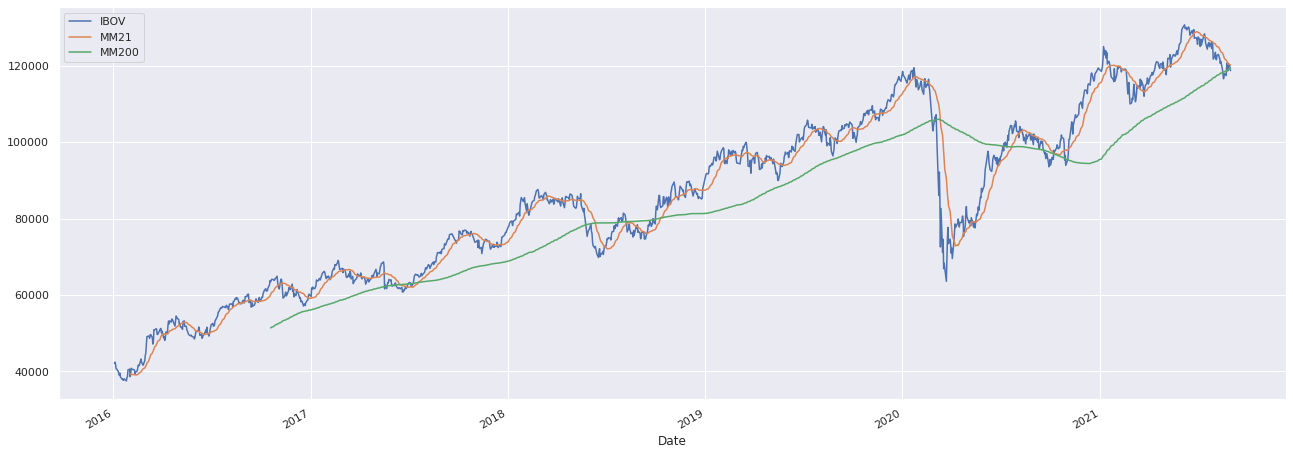

In [321]:
ibov["Close"].plot(figsize=(22,8), label="IBOV")
ibov["Close"].rolling(21).mean().plot(label="MM21")
ibov["Close"].rolling(200).mean().plot(label="MM200")
plt.legend();

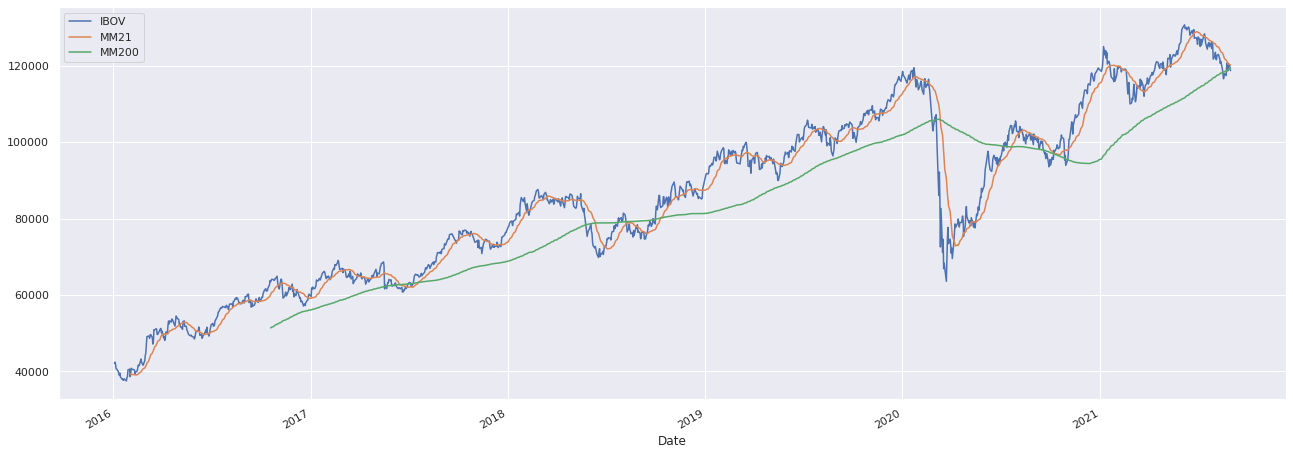

In [322]:
ibov_fatiado = ibov[(ibov.index.year >= 2016) & (ibov.index.year <= 2021)]
ibov_fatiado["Close"].plot(figsize=(22,8), label="IBOV")
ibov_fatiado["Close"].rolling(21).mean().plot(label="MM21")
ibov_fatiado["Close"].rolling(200).mean().plot(label="MM200")
plt.legend();

In [323]:
ibov_fatiado = ibov[ibov.index.month == 12]
ibov_fatiado.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-08,113590.0,114381.0,112820.0,113571.0,113571.0,8810900
2020-12-09,113799.0,114020.0,112567.0,112722.0,112722.0,8431100
2020-12-10,113002.0,115262.0,112732.0,114992.0,114992.0,11803600
2020-12-11,115128.0,115527.0,113949.0,115323.0,115323.0,8372300
2020-12-14,115137.0,115740.0,114431.0,114975.0,114975.0,8190900
2020-12-15,114613.0,116390.0,114613.0,116146.0,116146.0,8195100
2020-12-16,116149.0,118178.0,115496.0,117947.0,117947.0,9808100
2020-12-17,117864.0,119027.0,117856.0,118157.0,118157.0,7701400
2020-12-18,118395.0,119370.0,117639.0,117679.0,117679.0,8636000


In [324]:
ibov_fatiado = ibov[ibov.index.day == 21]
ibov_fatiado.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-21,99227.0,101240.0,99221.0,101202.0,101202.0,5969700
2019-10-21,104729.0,106027.0,104696.0,106022.0,106022.0,3504900
2019-11-21,105866.0,107497.0,105864.0,107497.0,107497.0,5819400
2020-01-21,118861.0,118861.0,117026.0,117026.0,117026.0,5085600
2020-02-21,114585.0,114585.0,112661.0,113681.0,113681.0,5896200
2020-05-21,81320.0,83309.0,81317.0,83027.0,83027.0,11395200
2020-07-21,104426.0,105449.0,103732.0,104310.0,104310.0,11105800
2020-08-21,101460.0,101566.0,100412.0,101521.0,101521.0,9100200
2020-09-21,98283.0,98283.0,95820.0,96991.0,96991.0,9738000


In [325]:
ibov_fatiado = ibov[ibov.index.year == 2016]
ibov_fatiado.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-09,60688.0,61129.0,60316.0,60501.0,60501.0,3339800
2016-12-12,60517.0,60517.0,59035.0,59179.0,59179.0,3244400
2016-12-13,59178.0,59946.0,58758.0,59281.0,59281.0,3589100
2016-12-14,59280.0,59338.0,58212.0,58212.0,58212.0,3857000
2016-12-15,58214.0,58635.0,57575.0,58396.0,58396.0,3569400
2016-12-16,58398.0,59312.0,58365.0,58389.0,58389.0,3683900
2016-12-19,58390.0,58600.0,57109.0,57111.0,57111.0,3396500
2016-12-20,57116.0,57918.0,57038.0,57583.0,57583.0,2673400
2016-12-21,57583.0,58049.0,57221.0,57647.0,57647.0,2461900


 **Yahoo Finance busca de códigos da Empresas que compõem os indices de acordo com as cotações **texto em negrito** **

In [326]:
t = get_tickers('ibov')
t

['ABEV3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BRAP4.SA',
 'BRDT3.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'BTOW3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HGTX3.SA',
 'HYPE3.SA',
 'IGTA3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LAME4.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RENT3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SULA11.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'USIM

In [327]:
ibov = yf.download(t, period='1mo', group_by='ticker')
ibov

[*********************100%***********************]  82 of 82 completed

3 Failed downloads:
- HGTX3.SA: No data found for this date range, symbol may be delisted
- VVAR3.SA: No data found, symbol may be delisted
- BTOW3.SA: No data found, symbol may be delisted


CIEL3.SA              ...   AZUL4.SA                     
               Open  High   Low  ...      Close  Adj Close    Volume
Date                             ...                                
2021-10-01     2.32  2.37  2.29  ...  38.720001  38.720001   4973800
2021-10-04     2.34  2.37  2.27  ...  36.959999  36.959999   4167000
2021-10-05     2.31  2.33  2.25  ...  36.250000  36.250000   3511600
2021-10-06     2.29  2.34  2.23  ...  35.669998  35.669998   4082200
2021-10-07     2.35  2.36  2.29  ...  35.360001  35.360001   3200300
2021-10-08     2.33  2.68  2.32  ...  35.860001  35.860001   4012200
2021-10-11     2.63  2.69  2.51  ...  35.070000  35.070000   3825900
2021-10-13     2.50  2.58  2.46  ...  34.970001  34.970001   4175200
2021-10-14     2.53  2.55  2.47  ...  35.160000  35.160000   3550100
2021-10-15     2.50  2.65  2.48  ...  35.619999  35.619999   3431700
2021-10-18     2.60  2.69  2.52  ...  34.360001  34.360001   5085300
2021-10-19     2.59  2.60  2.36  ...  30.799999  30.799999  16110400
2021-10-20     2.41  2.49  2.38  ...  30.680000  30.680000   8858200
2021-10-21     2.37  2.43  2.30  ...  29.690001  29.690001  10677800
2021-10-22     2.33  2.39  2.26  ...  29.190001  29.190001  12900600
2021-10-25     2.39  2.49  2.34  ...  29.360001  29.360001   7156500
2021-10-26     2.42  2.44  2.30  ...  26.900000  26.900000   8557200
2021-10-27     2.32  2.43  2.31  ...  26.360001  26.360001   7978800
2021-10-28     2.34  2.37  2.25  ...  26.010000  26.010000   7939200
2021-10-29     2.27  2.30  2.17  ...  24.870001  24.870001   8181700
2021-11-01     2.24  2.25  2.19  ...  27.100000  27.100000  10838900

[21 rows x 492 columns]

In [328]:
ifix = yf.download(get_tickers('ifix'), period='1mo', group_by='ticker')
ifix

[*********************100%***********************]  87 of 87 completed


HTMX11.SA               ...  XPSF11.SA                  
                 Open  High    Low  ...      Close  Adj Close Volume
Date                                ...                             
2021-10-01        NaN   NaN    NaN  ...  80.400002  80.400002  18774
2021-10-04        NaN   NaN    NaN  ...  80.320000  80.320000   6792
2021-10-05        NaN   NaN    NaN  ...  79.000000  79.000000  17324
2021-10-06        NaN   NaN    NaN  ...  77.500000  77.500000  16452
2021-10-07        NaN   NaN    NaN  ...  77.500000  77.500000  13161
2021-10-08        NaN   NaN    NaN  ...  77.989998  77.989998  10173
2021-10-11        NaN   NaN    NaN  ...  78.500000  78.500000  15658
2021-10-13        NaN   NaN    NaN  ...  78.400002  78.400002   9694
2021-10-14        NaN   NaN    NaN  ...  80.800003  80.800003   9380
2021-10-15        NaN   NaN    NaN  ...  80.900002  80.900002   7314
2021-10-18        NaN   NaN    NaN  ...  81.199997  81.199997   8422
2021-10-19        NaN   NaN    NaN  ...  81.500000  81.500000   6027
2021-10-20        NaN   NaN    NaN  ...  82.000000  82.000000   8082
2021-10-21        NaN   NaN    NaN  ...  79.790001  79.790001  12312
2021-10-22        NaN   NaN    NaN  ...  79.900002  79.900002  16191
2021-10-25        NaN   NaN    NaN  ...  80.959999  80.959999  13671
2021-10-26        NaN   NaN    NaN  ...  78.300003  78.300003  10184
2021-10-27        NaN   NaN    NaN  ...  79.010002  79.010002  11801
2021-10-28        NaN   NaN    NaN  ...  79.300003  79.300003   8886
2021-10-29        NaN   NaN    NaN  ...  79.099998  79.099998  10688
2021-11-01  96.849998  98.5  96.82  ...  78.400002  78.400002   6421

[21 rows x 522 columns]

##***Dados do site Vicente Guimarães***

https://vicenteguimaraes.penserico.com/dashboard.pr

In [223]:
url = "https://vicenteguimaraes.penserico.com/dashboard/cp.pr?e=VALE3"


In [224]:
header = {
  "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"  
 }

r = requests.get(url, headers=header)

In [225]:
dfs = pd.read_html(r.text)

In [226]:
df = pd.read_html(r.text,  decimal=',', thousands='.')[2]


In [227]:
df

,(valores em reais milhão),2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,Unnamed: 12
0,Patrimônio LíquidoRepresenta os valores que os...,"201.902 1T:201.902 2T:0,00 3T:0,00 4T:0,00 $(f...",180.986 1T:172.896 2T:180.375 3T:187.362 4T:18...,157.149 1T:168.260 2T:165.982 3T:177.706 4T:15...,173.682 1T:152.226 2T:165.338 3T:166.694 4T:17...,148.106 1T:138.050 2T:138.614 3T:147.231 4T:14...,133.702 1T:137.982 2T:133.151 3T:135.790 4T:13...,139.420 1T:155.002 2T:154.729 3T:176.797 4T:13...,149.602 1T:153.655 2T:150.545 3T:155.356 4T:14...,152.122 1T:156.518 2T:159.881 3T:168.592 4T:15...,155.633 1T:152.149 2T:160.616 3T:166.587 4T:1...,146.690 1T:126.985 2T:134.550 3T:145.687 4T:14...,Tri Isolado Tri Isolado (normalizado) Anualiza...
1,ReceitaRepresenta as vendas de uma empresa dim...,"69.301 1T:69.301 2T:0,00 3T:0,00 4T:0,00 $(fun...",208.529 1T:31.251 2T:40.434 3T:57.906 4T:78.93...,148.640 1T:30.952 2T:36.005 3T:40.665 4T:41.01...,134.483 1T:27.932 2T:31.233 3T:37.862 4T:37.45...,108.532 1T:26.742 2T:23.363 3T:28.600 4T:29.82...,94.633 1T:22.067 2T:23.202 3T:23.772 4T:25.591...,85.499 1T:18.027 2T:21.441 3T:23.350 4T:22.681...,88.275 1T:22.409 2T:22.084 3T:20.630 4T:23.152...,101.490 1T:21.801 2T:22.871 3T:28.191 4T:28.62...,93.511 1T:19.591 2T:23.405 3T:21.760 4T:28.756...,103.195 1T:22.985 2T:25.063 3T:28.009 4T:27.13...,Tri Isolado Tri Isolado (normalizado) Anualiza...
2,Despesas OperacionaisSão as despesas com as ve...,"-3.589 1T:-3.589 2T:0,00 3T:0,00 4T:0,00 $(fun...",-57.894 1T:-4.015 2T:-9.445 3T:-5.302 4T:-39.1...,-62.565 1T:-19.602 2T:-11.448 3T:-3.154 4T:-28...,-10.106 1T:-1.107 2T:-2.765 3T:-2.018 4T:-4.21...,-6.741 1T:432 2T:-2.158 3T:-1.686 4T:-3.328 $(...,-8.417 1T:-642 2T:-5.306 3T:-1.056 4T:-1.414 $...,-45.179 1T:-1.702 2T:-1.536 3T:-3.644 4T:-38.2...,-11.616 1T:-1.645 2T:-3.063 3T:-2.130 4T:-4.77...,-15.542 1T:-1.744 2T:-2.392 3T:-2.736 4T:-8.67...,-26.518 1T:-2.215 2T:-3.597 3T:-3.641 4T:-17.0...,-9.619 1T:464 2T:-2.420 3T:-3.093 4T:-4.570 $(...,Tri Isolado Tri Isolado (normalizado) Anualiza...
3,Resultado OperacionalResultado da empresa ante...,"40.315 1T:40.315 2T:0,00 3T:0,00 4T:0,00 $(fun...",52.068 1T:8.022 2T:8.321 3T:26.710 4T:9.014 $(...,2.240 1T:-6.401 2T:4.275 3T:14.884 4T:-10.518 ...,43.176 1T:9.855 2T:9.006 3T:13.017 4T:11.297 $...,34.534 1T:12.308 2T:4.743 3T:9.815 4T:7.667 $(...,25.073 1T:4.958 2T:1.106 3T:6.635 4T:12.374 $(...,-28.337 1T:1.337 2T:3.938 3T:1.681 4T:-35.293 ...,17.573 1T:7.593 2T:5.455 3T:3.690 4T:835 $(fun...,33.437 1T:8.619 2T:7.614 3T:11.163 4T:6.041 $(...,14.996 1T:7.327 2T:8.138 3T:5.754 4T:-6.222 $...,53.087 1T:13.936 2T:13.246 3T:14.473 4T:11.433...,Tri Isolado Tri Isolado (normalizado) Anualiza...
4,"Lucro LíquidoA partir da receita, se diminui o...","30.564 1T:30.564 2T:0,00 3T:0,00 4T:0,00 $(fun...",26.713 1T:984 2T:5.288 3T:15.615 4T:4.825 $(fu...,-6.671 1T:-6.422 2T:-384 3T:6.542 4T:-6.407 $(...,25.657 1T:5.112 2T:306 3T:5.753 4T:14.485 $(fu...,17.627 1T:7.891 2T:60 3T:7.143 4T:2.533 $(func...,13.311 1T:6.311 2T:3.585 3T:1.842 4T:1.573 $(f...,-44.212 1T:-9.538 2T:5.144 3T:-6.663 4T:-33.15...,954 1T:5.909 2T:3.187 3T:-3.381 4T:-4.760 $(fu...,115 1T:6.201 2T:832 3T:7.949 4T:-14.867 $(func...,9.734 1T:6.720 2T:5.314 3T:3.328 4T:-5.628 $(f...,37.814 1T:11.291 2T:10.275 3T:7.893 4T:8.354 $...,Tri Isolado Tri Isolado (normalizado) Anualiza...
5,"Dívida BrutaRepresenta os empréstimos, financi...","78.668 1T:78.668 2T:0,00 3T:0,00 4T:0,00 $(fun...",78.089 1T:97.574 2T:101.608 3T:84.982 4T:78.08...,59.843 1T:73.249 2T:67.559 3T:69.117 4T:59.843...,59.928 1T:67.394 2T:69.043 3T:67.306 4T:59.928...,74.392 1T:93.690 2T:92.141 3T:81.703 4T:74.392...,95.563 1T:111.998 2T:102.116 3T:102.090 4T:95....,112.667 1T:91.385 2T:92.374 3T:113.920 4T:112....,76.517 1T:67.560 2T:65.771 3T:71.781 4T:76.517...,68.977 1T:60.434 2T:66.180 3T:65.824 4T:68.977...,61.856 1T:45.519 2T:50.608 3T:58.623 4T:61.85...,46.624 1T:41.292 2T:41.006 3T:45.919 4T:46.624...,Tri Isolado Tri Isolado (normal

## **Quantstats**

In [330]:
qs.extend_pandas()

In [331]:
Vale = qs.utils.download_returns("vale3.sa")

In [332]:
Vale.monthly_returns()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2000,0.142857,-0.150000,-0.019608,0.000000,0.045500,0.075801,-0.010891,0.038202,-0.089827,0.046373,-0.159091,0.256757,0.180191
2001,0.096774,-0.039216,0.010204,-0.020202,0.067011,0.024154,-0.003773,-0.028409,-0.015594,0.049307,-0.065861,0.050505,0.156602
2002,-0.015385,0.205078,0.029174,0.014173,0.179969,0.022503,0.068211,-0.096386,0.154667,0.108545,0.041667,0.029000,0.735544
2003,-0.059281,0.074380,-0.125000,-0.099011,0.073302,-0.045454,0.225000,0.076773,0.056047,0.111016,-0.007692,0.313953,0.540849
2004,-0.079646,0.080128,-0.053353,-0.183061,0.205664,-0.073898,0.126460,0.025016,0.146429,-0.049844,0.091803,0.133633,0.358583
2005,0.049007,0.142677,-0.060774,-0.194118,0.021168,-0.009292,0.132612,0.033253,0.220715,-0.058889,0.027155,-0.002090,0.290631
2006,0.185235,-0.082074,0.016362,0.013447,-0.015137,-0.007970,-0.033091,-0.090010,0.018478,0.155817,0.102862,0.066644,0.337247
2007,0.116169,0.019831,0.052269,0.100917,0.035952,-0.009653,0.076816,0.045043,0.277583,0.049233,-0.035384,-0.054067,0.698498
2008,-0.126117,0.131777,0.031367,0.092753,-0.001980,-0.123798,-0.175261,-0.081749,-0.159190,-0.218928,-0.030292,0.005811,-0.523015
2009,0.173709,-0.050154,0.004211,0.181135,0.053769,-0.092583,0.073913,-0.009987,0.122956,0.099457,0.094196,0.013056,0.713926


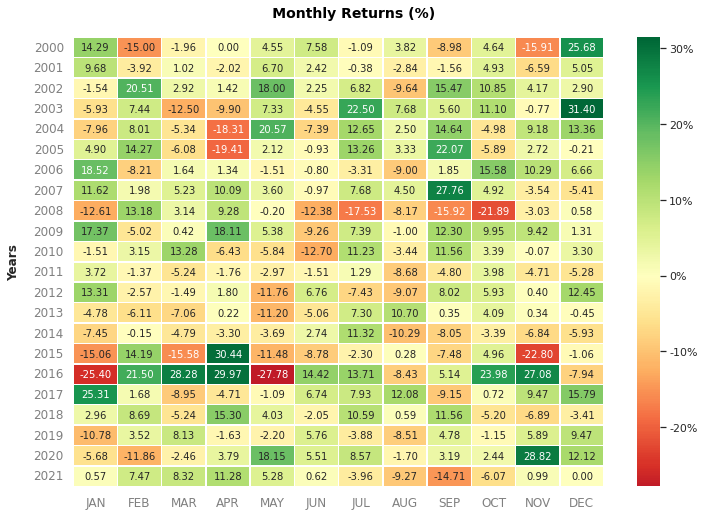

In [333]:
Vale.plot_monthly_heatmap()

In [334]:
dir(qs.stats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_ceil',
 '_linregress',
 '_norm',
 '_np',
 '_pd',
 '_sqrt',
 '_utils',
 'adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',

[Performance Metrics]

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2000-01-03  2000-01-03
End Period          2021-11-01  2021-11-01
Risk-Free Rate      0.0%        0.0%
Time in Market      96.0%       99.0%

Cumulative Return   3,777.66%   523.46%
CAGR﹪              18.23%      8.74%

Sharpe              0.62        0.44
Sortino             0.91        0.62
Sortino/√2          0.65        0.44
Omega               1.12        1.12

Max Drawdown        -83.84%     -59.96%
Longest DD Days     3642        3400

Gain/Pain Ratio     0.12        0.08
Gain/Pain (1M)      0.72        0.45

Payoff Ratio        1.08        0.98
Profit Factor       1.12        1.08
Common Sense Ratio  1.23        1.05
CPC Index           0.61        0.55
Tail Ratio          1.11        0.97
Outlier Win Ratio   3.27        4.69
Outlier Loss Ratio  2.99        4.2

MTD                 0.99%       1.98%
3M                  -26.6%      -13.34%
6M          

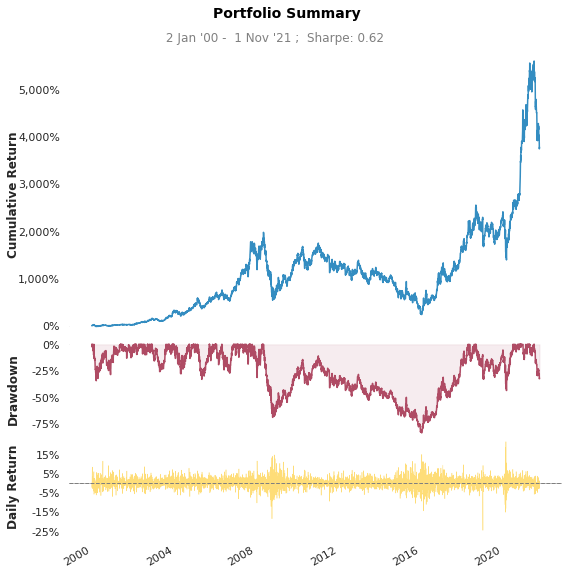

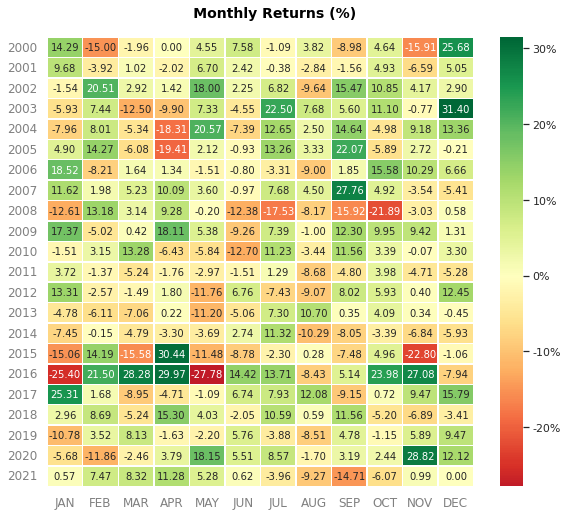

In [335]:
qs.reports.basic(Vale, benchmark="^BVSP");

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-01-03  2000-01-03
End Period                 2021-11-01  2021-11-01
Risk-Free Rate             0.0%        0.0%
Time in Market             96.0%       99.0%

Cumulative Return          3,777.66%   523.46%
CAGR﹪                     18.23%      8.74%

Sharpe                     0.62        0.44
Smart Sharpe               0.61        0.43
Sortino                    0.91        0.62
Smart Sortino              0.9         0.62
Sortino/√2                 0.65        0.44
Smart Sortino/√2           0.64        0.44
Omega                      1.12        1.12

Max Drawdown               -83.84%     -59.96%
Longest DD Days            3642        3400
Volatility (ann.)          40.87%      28.32%
R^2                        0.39        0.39
Calmar                     0.22        0.15
Skew                       0.12        -0.14
Kurtosis        

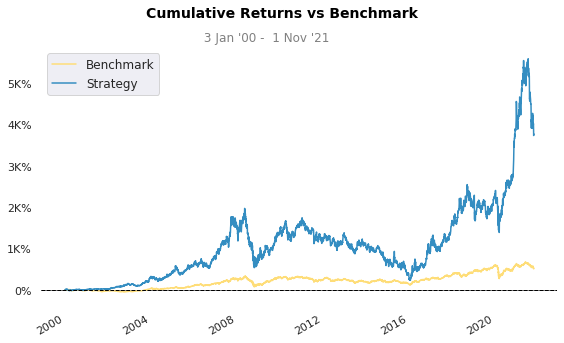

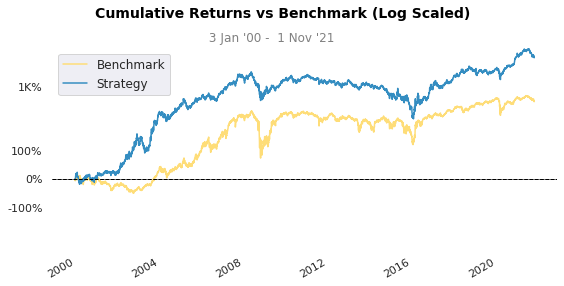

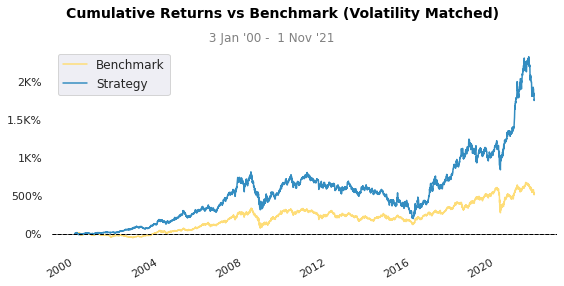

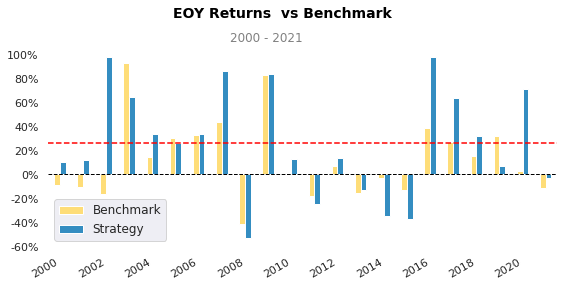

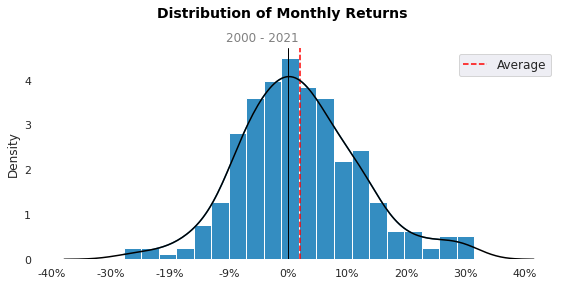

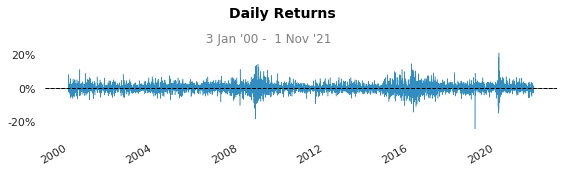

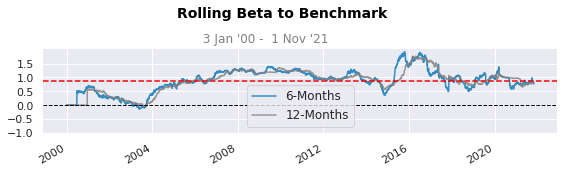

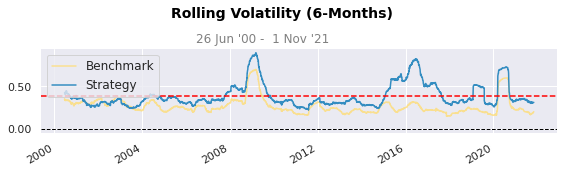

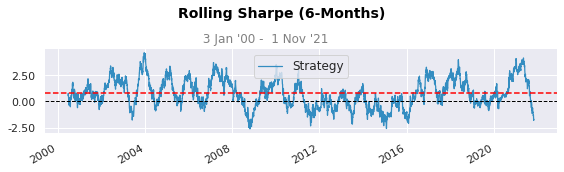

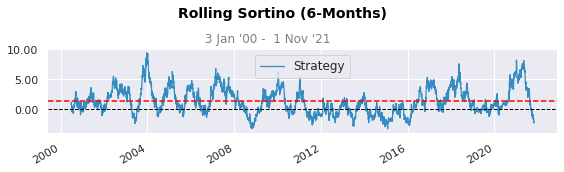

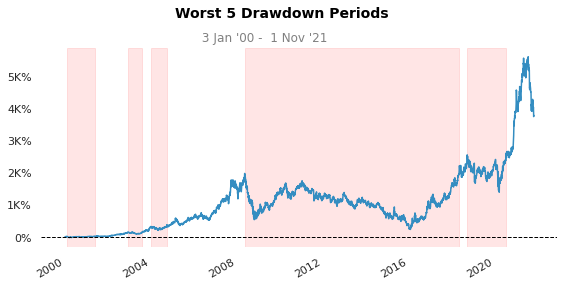

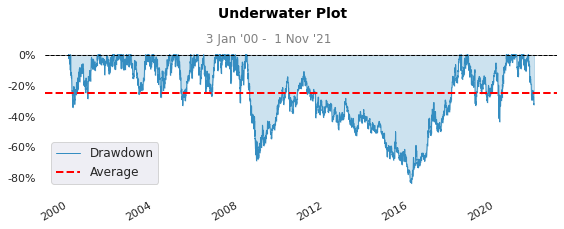

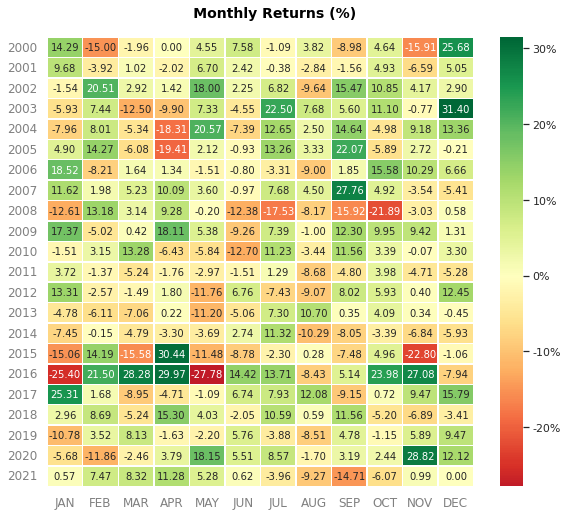

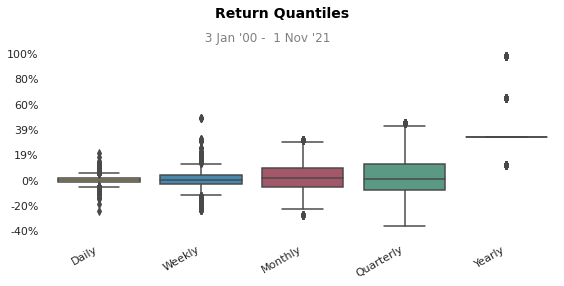

In [336]:
qs.reports.full(Vale, benchmark="^BVSP");

## **Simulando uma carteira de ações**

In [235]:
tickers = "VALE3.SA, ITUB4.SA, B3SA3.SA, PETR4.SA, BBDC4.SA, PETR3.SA, MGLU3.SA, ABEV3.SA, WEGE3.SA, SUZB3.SA, GNDI3.SA, ITSA4.SA, JBSS3.SA, NTCO3.SA, BBAS3.SA"
carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]

[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  1 of 1 completed


In [236]:
carteira.dropna(inplace=True)
carteira

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GNDI3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2019-12-18,18.036320,14.901791,46.054024,30.314556,64.650803,13.157246,34.779797,23.708218,11.825765,36.745049,28.471340,27.502115,39.570000,42.502636,16.620155
2019-12-19,18.111906,14.901791,46.526932,30.873583,66.006561,13.166663,34.951424,24.047169,11.847698,38.834198,28.427338,27.565153,39.669998,42.923931,16.473070
2019-12-20,18.335501,15.067501,46.435989,30.653183,66.540947,13.044228,34.798874,23.818150,11.840386,39.024124,28.101698,27.249971,40.180000,43.551888,16.615250
2019-12-23,18.383978,14.383173,47.836521,30.842138,65.699783,13.138408,35.123024,24.111296,11.876939,39.833794,28.515348,27.466097,40.040001,43.384960,16.584940
2019-12-26,18.636082,14.315660,48.382187,31.228626,67.609718,13.364445,35.656914,24.267029,11.962227,39.423958,28.770576,27.835314,40.720001,43.551888,17.105211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,15.160000,12.150000,29.200001,20.290001,65.290001,10.470000,23.722025,36.889999,11.980000,40.560001,29.270000,28.760000,50.450001,76.180000,39.660000
2021-10-27,15.220000,12.120000,29.170000,20.559999,66.279999,10.520000,23.901890,37.520000,11.600000,39.570000,29.309999,28.690001,48.380001,74.449997,39.200001
2021-10-28,16.700001,12.040000,28.910000,20.490000,64.959999,10.470000,23.851927,37.480000,11.150000,38.910000,29.590000,28.959999,48.910000,73.699997,37.830002


In [237]:
ibov.dropna(inplace=True)
ibov

Date
2016-11-01     63326.0
2016-11-03     61750.0
2016-11-04     61598.0
2016-11-07     64052.0
2016-11-08     64158.0
                ...   
2021-10-26    106420.0
2021-10-27    106363.0
2021-10-28    105705.0
2021-10-29    103501.0
2021-11-01    105551.0
Name: Adj Close, Length: 1232, dtype: float64

# **Resultado**

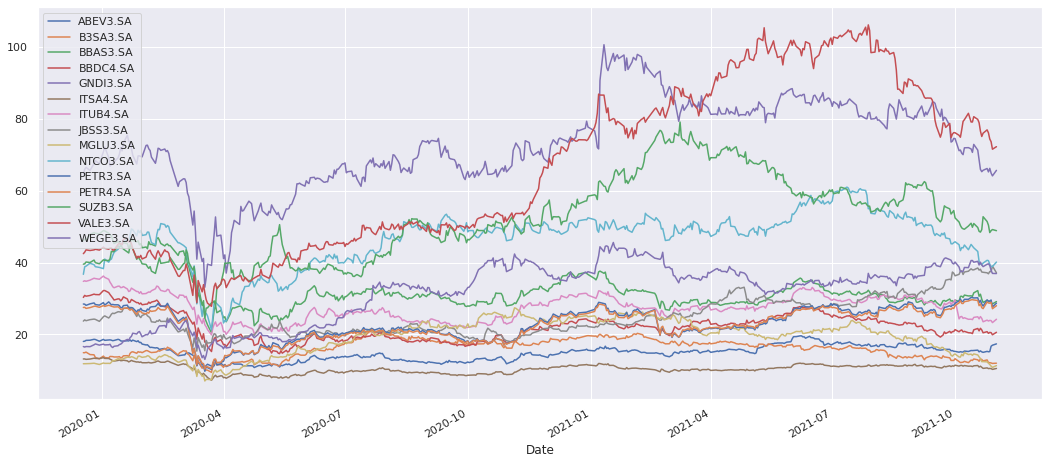

In [238]:
sns.set()
carteira.plot(figsize=(18,8));

In [239]:
carteira_normalizada = (carteira / carteira.iloc[0])*10000
carteira_normalizada.dropna(inplace=True)

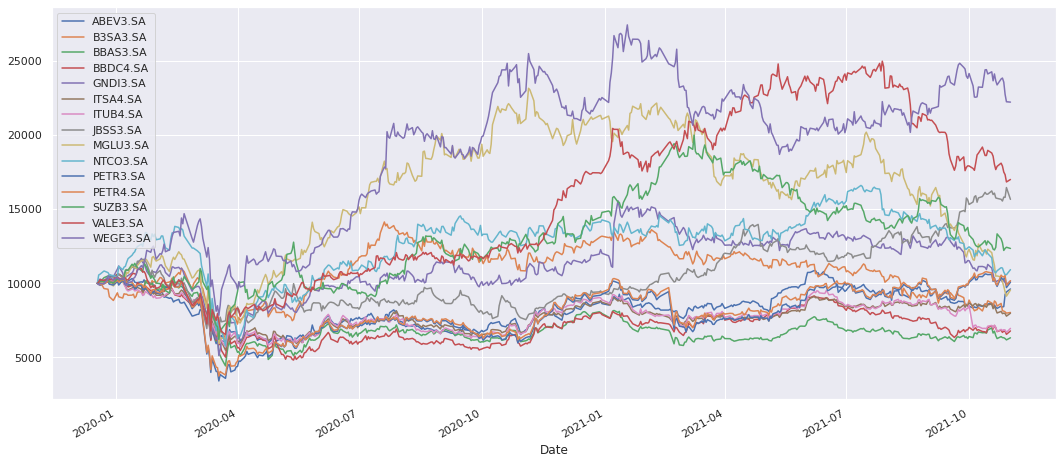

In [240]:
carteira_normalizada.plot(figsize=(18,8));

In [241]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)

In [242]:
carteira_normalizada

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GNDI3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,saldo
Date,,,,,,,,,,,,,,,,
2019-12-18,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,150000.000000
2019-12-19,10041.907839,10000.000000,10102.685494,10184.408677,10209.704847,10007.157679,10049.346765,10142.967774,10018.547262,10568.552651,9984.544973,10022.921100,10025.271285,10099.122127,9911.501916,151368.640389
2019-12-20,10165.876958,10111.201703,10082.938603,10111.704377,10292.362086,9914.102055,10005.485168,10046.368710,10012.364304,10620.240199,9870.170405,9908.318376,10154.157345,10246.867408,9997.048342,151539.206037
2019-12-23,10192.754488,9651.976301,10387.044879,10174.035921,10162.253316,9985.682468,10098.685852,10170.016188,10043.273450,10840.588118,10015.457037,9986.903418,10118.777161,10207.592823,9978.811643,152013.853062
2019-12-26,10332.530124,9606.671334,10505.528716,10301.528456,10457.676563,10157.479082,10252.191572,10235.703585,10115.393986,10729.053140,10105.100882,10121.153789,10290.624598,10246.867408,10291.848008,153749.351242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26,8405.262311,8153.382321,6340.379926,6693.154547,10098.869353,7957.592764,6820.633597,15560.005387,10130.422760,11038.222292,10280.513763,10457.377539,12749.558037,17923.594288,23862.592767,166471.561652
2021-10-27,8438.528753,8133.250691,6333.865688,6782.220193,10251.999372,7995.594784,6872.348932,15825.736484,9809.091183,10768.797780,10294.562631,10431.925062,12226.434532,17516.559920,23585.820935,165266.736939
2021-10-28,9259.095542,8079.565919,6277.410202,6759.129076,10047.825620,7957.592764,6857.983408,15808.864311,9428.565461,10589.181784,10392.907382,10530.098802,12360.374077,17340.100276,22761.521219,164450.215845


In [243]:
ibov_normalizado = (ibov / ibov.iloc[0])*50000
ibov_normalizado

Date
2016-11-01    50000.000000
2016-11-03    48755.645391
2016-11-04    48635.631494
2016-11-07    50573.224268
2016-11-08    50656.918169
                  ...     
2021-10-26    84025.518744
2021-10-27    83980.513533
2021-10-28    83460.979692
2021-10-29    81720.778195
2021-11-01    83339.386666
Name: Adj Close, Length: 1232, dtype: float64

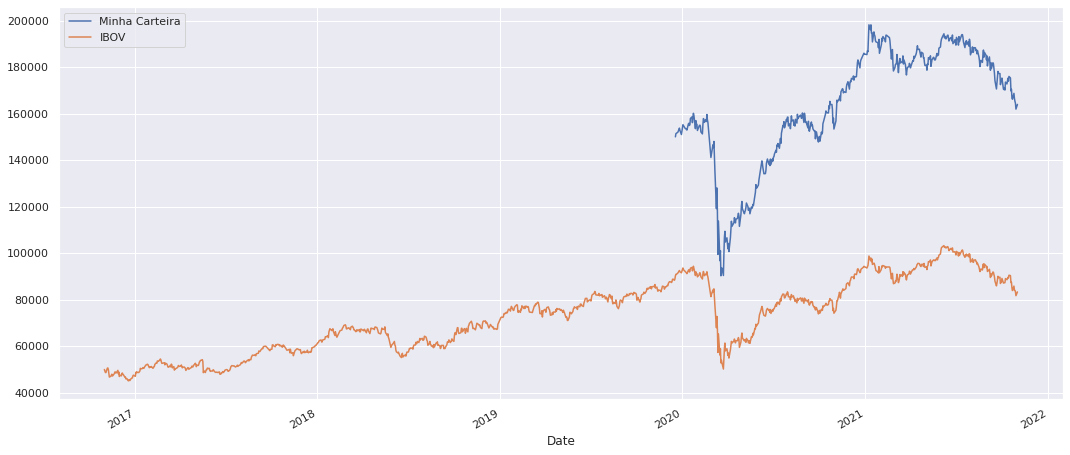

In [244]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Minha Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();

In [245]:
carteira_normalizada.describe()

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,GNDI3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,MGLU3.SA,NTCO3.SA,PETR3.SA,PETR4.SA,SUZB3.SA,VALE3.SA,WEGE3.SA,saldo
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,8265.360036,10820.055691,6957.324639,7240.378609,11266.639892,7893.997045,7848.027789,10483.341798,16058.573688,12692.787607,8077.119391,8236.594739,13110.898783,15614.137082,18974.308784,163539.545572
std,1204.832899,1676.350594,1181.461167,1239.603233,1907.484423,950.736784,1025.704513,2203.086432,4132.706490,2039.230850,1593.248315,1568.922005,2966.312074,5508.702560,4982.993748,25027.711530
min,5929.646246,6322.656451,4431.595988,4827.564728,5127.813489,5492.802021,5713.691476,6472.179579,5940.991901,5782.641027,3415.765615,3747.953139,6221.885527,6546.398516,7843.500868,90268.392614
25%,7223.900555,9382.440166,6275.774498,6237.544325,10130.110539,7200.067525,6987.643703,8721.053547,12057.924529,11521.280211,7079.581900,7196.836382,10360.753282,10633.578329,13681.124357,152134.353362
50%,8362.924332,11150.385328,6687.784410,7216.988795,11140.619856,7879.281597,7842.062603,9822.057784,17101.036893,13257.568601,7920.676522,8299.421202,12884.761436,15030.120777,20576.674928,168146.892980
75%,9164.840974,12015.726376,7095.661888,7908.465965,12757.388266,8550.421807,8637.924378,12104.913831,19387.950836,13845.402603,9536.009375,9622.282645,15129.517023,20462.720109,22564.407991,184257.916820
max,10866.962147,14148.381572,10624.012552,10632.239804,15582.421810,10272.011366,10429.107692,16471.081826,23171.077787,16614.483227,10642.280639,10791.897291,20010.108900,25001.230051,27450.571212,198144.337577


In [246]:
carteira_normalizada.plot_rolling_beta

<bound method rolling_beta of                 ABEV3.SA      B3SA3.SA  ...      WEGE3.SA          saldo
Date                                    ...                             
2019-12-18  10000.000000  10000.000000  ...  10000.000000  150000.000000
2019-12-19  10041.907839  10000.000000  ...   9911.501916  151368.640389
2019-12-20  10165.876958  10111.201703  ...   9997.048342  151539.206037
2019-12-23  10192.754488   9651.976301  ...   9978.811643  152013.853062
2019-12-26  10332.530124   9606.671334  ...  10291.848008  153749.351242
...                  ...           ...  ...           ...            ...
2021-10-26   8405.262311   8153.382321  ...  23862.592767  166471.561652
2021-10-27   8438.528753   8133.250691  ...  23585.820935  165266.736939
2021-10-28   9259.095542   8079.565919  ...  22761.521219  164450.215845
2021-10-29   9419.881674   7992.328004  ...  22262.126470  161920.601805
2021-11-01   9625.023767   8039.302020  ...  22238.058755  163937.009998

[460 rows x 16 colum

## **Salvando Dados em Excel**

In [280]:
ibov.to_excel('ibovteste1.xlsx')
files.download('ibovteste1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [248]:
ifix.to_excel('ifix.xlsx')
files.download('ifix.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
carteira_normalizada.to_excel('resultadocarteira.xlsx')
files.download

In [329]:
ibov_normalizado.to_excel('ibovnormalizado.xlsx')
files.download

<function google.colab.files.download>

### **Salvando Dados em CSV**





In [249]:
ibov.to_csv('ibovteste1.csv')
files.download('ibovteste1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [250]:
ifix.to_csv('ifix.csv')
files.download('ifix.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Quantstats

In [251]:
qs.extend_pandas()

In [252]:
Vale = qs.utils.download_returns("vale3.sa")

In [253]:
Vale.monthly_returns()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2000,0.142857,-0.150000,-0.019608,-1.110223e-16,0.045500,0.075800,-0.010891,0.038202,-0.089827,0.046373,-0.159091,0.256757,0.180191
2001,0.096774,-0.039216,0.010204,-2.020220e-02,0.067010,0.024155,-0.003774,-0.028409,-0.015595,0.049307,-0.065861,0.050505,0.156602
2002,-0.015385,0.205078,0.029173,1.417287e-02,0.179969,0.022503,0.068211,-0.096385,0.154666,0.108546,0.041666,0.029000,0.735543
2003,-0.059281,0.074381,-0.125000,-9.901124e-02,0.073302,-0.045454,0.225000,0.076774,0.056047,0.111016,-0.007692,0.313953,0.540850
2004,-0.079646,0.080128,-0.053353,-1.830608e-01,0.205663,-0.073897,0.126460,0.025015,0.146429,-0.049844,0.091803,0.133634,0.358583
2005,0.049007,0.142677,-0.060773,-1.941175e-01,0.021168,-0.009292,0.132612,0.033253,0.220715,-0.058889,0.027155,-0.002090,0.290630
2006,0.185236,-0.082074,0.016362,1.344665e-02,-0.015137,-0.007970,-0.033091,-0.090010,0.018478,0.155816,0.102862,0.066644,0.337247
2007,0.116169,0.019831,0.052269,1.009174e-01,0.035952,-0.009653,0.076816,0.045043,0.277583,0.049233,-0.035384,-0.054067,0.698497
2008,-0.126117,0.131777,0.031367,9.275252e-02,-0.001980,-0.123798,-0.175261,-0.081749,-0.159190,-0.218928,-0.030293,0.005812,-0.523014
2009,0.173709,-0.050154,0.004211,1.811352e-01,0.053769,-0.092583,0.073913,-0.009986,0.122955,0.099457,0.094197,0.013056,0.713925


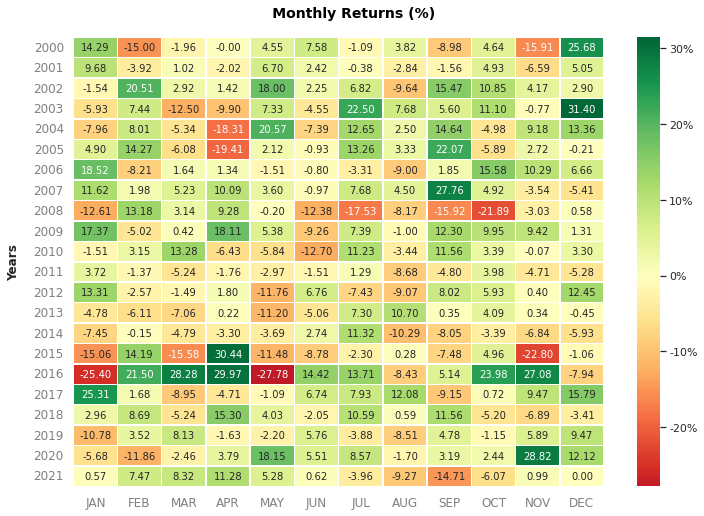

In [254]:
Vale.plot_monthly_heatmap()

In [255]:
dir(qs.stats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_ceil',
 '_linregress',
 '_norm',
 '_np',
 '_pd',
 '_sqrt',
 '_utils',
 'adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_squared',
 'rar',
 'recovery_factor',
 'remove_outliers',
 'risk_of_ruin',
 'risk_return_ratio',
 'rolling_greeks',
 'rolling_sharpe',

[Performance Metrics]

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2000-01-03  2000-01-03
End Period          2021-11-01  2021-11-01
Risk-Free Rate      0.0%        0.0%
Time in Market      96.0%       99.0%

Cumulative Return   3,777.66%   523.46%
CAGR﹪              18.23%      8.74%

Sharpe              0.62        0.44
Sortino             0.91        0.62
Sortino/√2          0.65        0.44
Omega               1.12        1.12

Max Drawdown        -83.84%     -59.96%
Longest DD Days     3642        3400

Gain/Pain Ratio     0.12        0.08
Gain/Pain (1M)      0.72        0.45

Payoff Ratio        1.08        0.98
Profit Factor       1.12        1.08
Common Sense Ratio  1.23        1.05
CPC Index           0.61        0.55
Tail Ratio          1.11        0.97
Outlier Win Ratio   3.27        4.69
Outlier Loss Ratio  2.99        4.2

MTD                 0.99%       1.98%
3M                  -26.6%      -13.34%
6M          

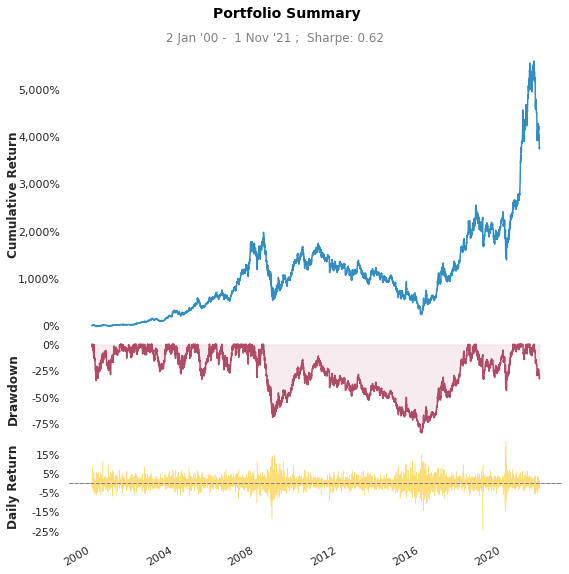

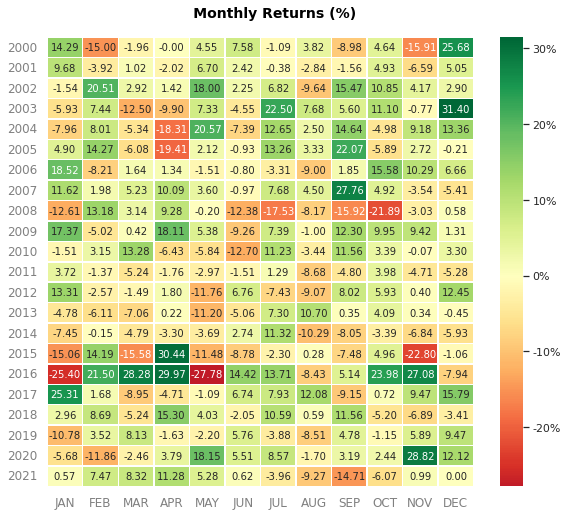

In [256]:
qs.reports.basic(Vale, benchmark="^BVSP");

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2000-01-03  2000-01-03
End Period                 2021-11-01  2021-11-01
Risk-Free Rate             0.0%        0.0%
Time in Market             96.0%       99.0%

Cumulative Return          3,777.66%   523.46%
CAGR﹪                     18.23%      8.74%

Sharpe                     0.62        0.44
Smart Sharpe               0.61        0.43
Sortino                    0.91        0.62
Smart Sortino              0.9         0.62
Sortino/√2                 0.65        0.44
Smart Sortino/√2           0.64        0.44
Omega                      1.12        1.12

Max Drawdown               -83.84%     -59.96%
Longest DD Days            3642        3400
Volatility (ann.)          40.87%      28.32%
R^2                        0.39        0.39
Calmar                     0.22        0.15
Skew                       0.12        -0.14
Kurtosis        

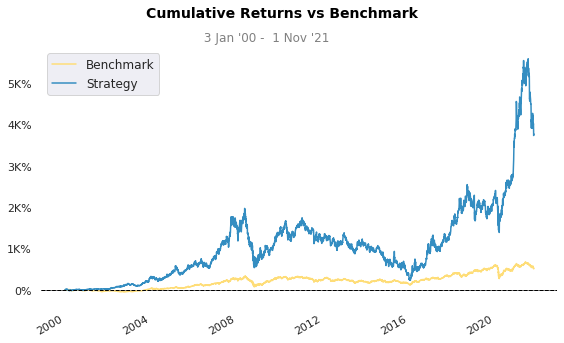

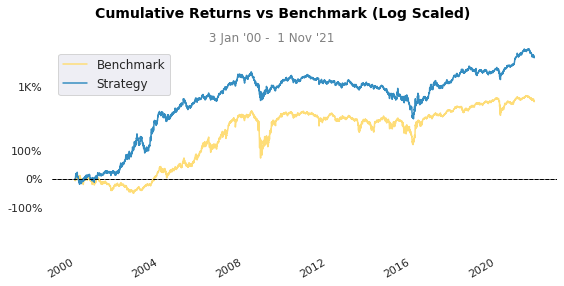

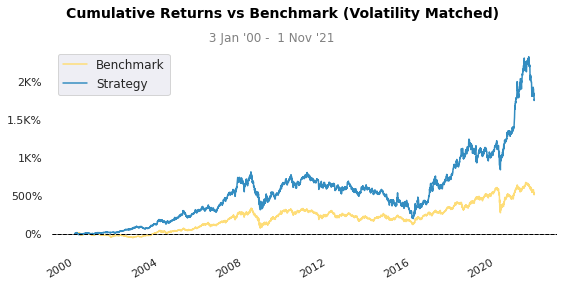

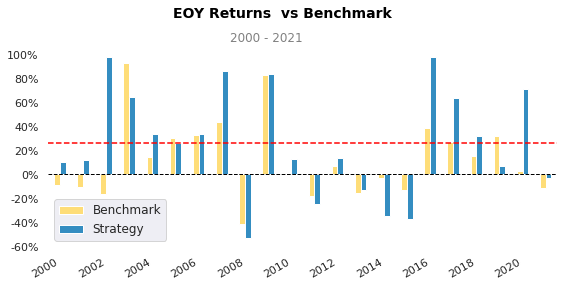

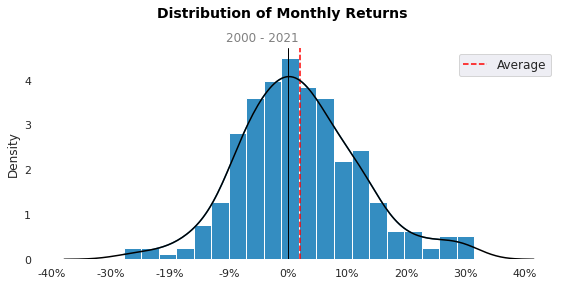

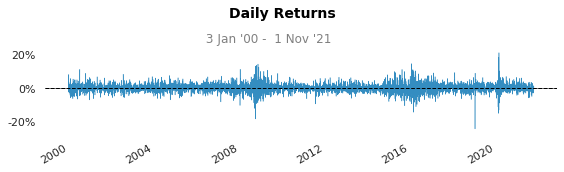

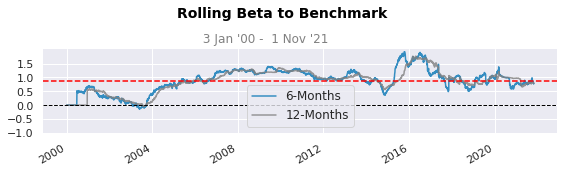

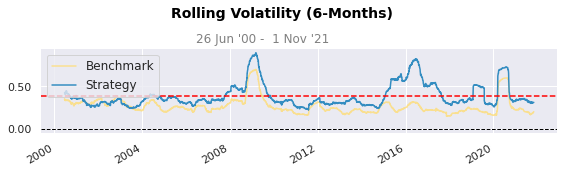

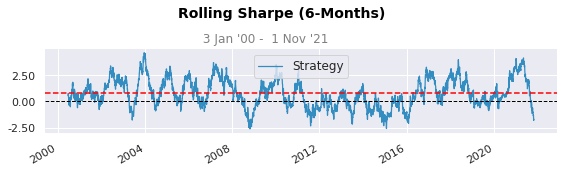

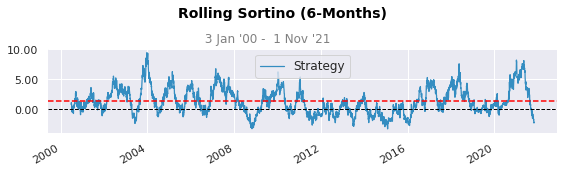

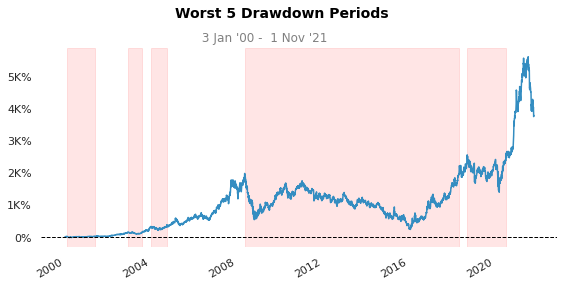

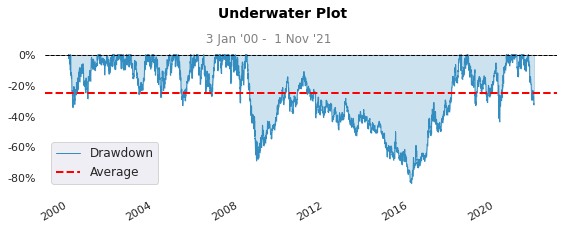

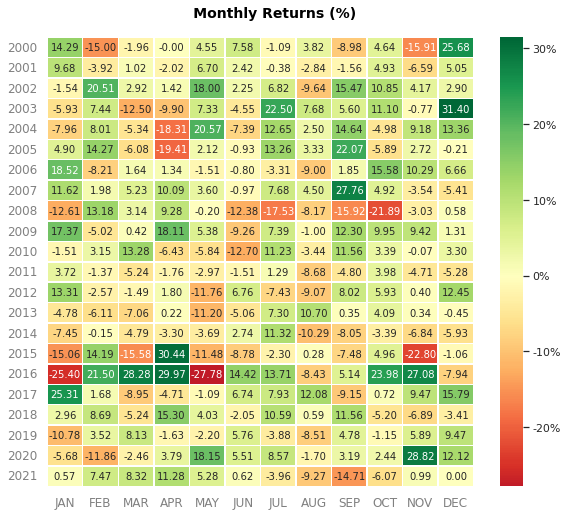

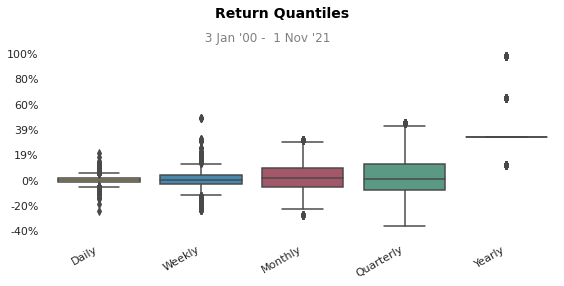

In [257]:
qs.reports.full(Vale, benchmark="^BVSP");